In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import string
from collections import Counter

In [3]:
#Libraries for Plotting
import matplotlib.pyplot as plt

In [4]:
data_path = "/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 2 Learning Linear Classifiers/amazon_baby_subset.csv"
important_words_path = "/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 2 Learning Linear Classifiers/important_words.json"


In [5]:
os.getcwd()

'/home/shrikrishna/Desktop/Coursera Machine Learning/Machine Learning: Classification/Week 7'

In [6]:
products = pd.read_csv(data_path + "/amazon_baby_subset.csv")
important_words = pd.read_json(important_words_path + "/important_words.json")


In [7]:
def find_missing(data):
    features = data.columns.tolist()
    missing_value_count = data.isna().sum()
    missing_value_percentage = data.isna().sum()*100/(data.shape[0])
    
    missing_data = pd.DataFrame({'Features': features,
                                 'Missing Value Count': missing_value_count,
                                 'Missing Value Percentage': missing_value_percentage},
                                 columns = ['Features', 
                                            'Missing Value Count',
                                            'Missing Value Percentage'])
    
    #Sort the missing data in descending order of "Missing Value Count"
    missing_data = missing_data.sort_values(by = 'Missing Value Count',
                                            ascending = False)
    return (missing_data)

In [8]:
find_missing(important_words).head()

,Features,Missing Value Count,Missing Value Percentage
0,0,0,0.0


In [9]:
find_missing(products).head()

,Features,Missing Value Count,Missing Value Percentage
review,review,241,0.454100
name,name,90,0.169581
rating,rating,0,0.000000
sentiment,sentiment,0,0.000000


In [10]:
#Fill the missing values in reviews 

Let us perform 2 simple data transformations:

    Remove punctuation
    Compute word counts (only for important_words)

In [11]:
#Remove Punctuations
def remove_punctuations(text):
    punctuations = string.punctuation
    if(type(text) == str):
        text = ''.join(ele for ele in text if(ele not in punctuations))
        return text
    return str(text)

In [12]:
#Apply the remove_punctuation function on every element of
#the review column and assign the result to the new column review_clean.
products['review_clean'] = products['review'].apply(remove_punctuations)
products[['review', 'review_clean']].head()

,review,review_clean
0,All of my kids have cried non-stop when I trie...,All of my kids have cried nonstop when I tried...
1,We wanted to get something to keep track of ou...,We wanted to get something to keep track of ou...
2,My daughter had her 1st baby over a year ago. ...,My daughter had her 1st baby over a year ago S...
3,"One of baby's first and favorite books, and it...",One of babys first and favorite books and it i...
4,Very cute interactive book! My son loves this ...,Very cute interactive book My son loves this b...


### 4. Now we proceed with the second item. For each word in important_words, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word).

In [13]:
def word_count(text):
    word_count = dict(Counter(text.split()))
    if(word in word_count.keys()):
        return word_count[word]
    return 0
f = 0
for word in important_words.iloc[:, 0]:
    if(not f):
        print(sum(list(map(word_count, products['review_clean']))))
        f = 1
    products[word] = list(map(word_count, products['review_clean']))



18715


In [14]:
len(products.columns)

198

In [15]:
train_index = pd.read_json(os.getcwd() + "/train-idx.json/train-idx.json") 
test_index = pd.read_json(os.getcwd() + "/validation-idx.json/validation-idx.json")


In [16]:
train_data = products.iloc[train_index[0].tolist(), :]

In [17]:
test_data = products.iloc[test_index[0].tolist(), :]

In [18]:
train_data.shape

(47780, 198)

In [19]:
test_data.shape

(5292, 198)

### Convert train_data and validation_data into multi-dimensional arrays.

In [20]:
['constant'] + important_words[0].tolist()

['constant',
 'baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'ha

In [21]:
train_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
def get_numpy_data(data, important_words, target_sentiment):
    ##Prepend a constant column
    data['constant'] = 1
    features = ['constant'] + important_words.tolist()
    
    feature_matrix = np.array(data[features])
    sentiment_matrix = np.array(data[target_sentiment])
    
    return (feature_matrix, sentiment_matrix)

In [23]:
train_matrix, train_sentiment = get_numpy_data(train_data, important_words[0],\
                                               'sentiment')
test_matrix, test_sentiment = get_numpy_data(test_data, important_words[0],\
                                            'sentiment')


/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
test_matrix

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

### Probability

In [25]:
def predict_probability(weights, features):
    score = np.dot(weights, features)
    return (1 + np.e ** ((-1)*(score))) ** (-1)

### The derivative of log likelihood with respect to a single coefficient is as follows

9. Let us now work on making minor changes to how the derivative computation is performed for logistic regression.

In [26]:
def feature_derivative(errors, feature_j):
    return np.dot(errors, feature_j)

In [27]:
def average_log_likelihood(feature_matrix, sentiment, weights):
    probability = predict_probability(weights, features)
    
    '''
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]
    '''
    
    indicator = [sentiment==1]
    scores = np.dot(feature_matrix, weights)
    
    lp = (1/(len(feature_matrix))) * np.sum(((indicator - 1) * scores)\
                                            + np.log(probability))
    
    return lp

In [28]:
train_data.columns.tolist()

['name',
 'review',
 'rating',
 'sentiment',
 'review_clean',
 'baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monito

In [29]:
# list(map(lambda col:col if(col.startswith('sentiment')) else "Shiv",\
#         train_data.columns.tolist()))
[col for col in train_data.columns.tolist() if(col.startswith('sentiment'))]

['sentiment']

In [30]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data,\
                                                       important_words[0],\
                                                      'sentiment') 
feature_matrix_test, sentiment_test = get_numpy_data(test_data,\
                                                    important_words[0],\
                                                    'sentiment')

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
list(map(lambda x: x.shape, [feature_matrix_train, feature_matrix_test]))

[(47780, 194), (5292, 194)]

### Quiz question: How are the functions ℓℓ(w) and ℓℓA(w) related?

In [32]:
print("llA(w) = ll(w)/N")

llA(w) = ll(w)/N


### Computing the gradient for a single data point

    1. First, compute P(yi=+1|xi,w)$ using the predict_probability function with feature_matrix_train[i:i+1,:] as the first parameter.
    
    2. Next, compute the indicator value 1[yi=+1] using sentiment_train[i:i+1].
    
    3. Finally, call the feature_derivative function with feature_matrix_train[i:i+1,j] as one of the parameters.

In [33]:
coefficients = np.zeros(194)

In [34]:
temp_weights = np.ones(194)
temp_weights = temp_weights.reshape(1, 194)
np.dot(temp_weights, coefficients)

array([0.])

In [35]:
temp_target = train_data['sentiment']
print(temp_target.shape[0])

#print("Shapes:- %d\t%d" %(temp_target.shape[0], temp_target.shape[1]))

47780


In [36]:

coefficients = coefficients.reshape(1, 194)
j = 1 #First Feature
def compute_gradient_single(feature_matrix, ind, \
                            sentiment_matrix, weights = coefficients):
    print("Step 1:- Compute Probability")
    feature_matrix_reshaped = feature_matrix[ind:ind+1, :].reshape(194, 1)
    
    predictions = predict_probability(weights,\
                                      feature_matrix_reshaped)
    print("A few predictions:-")
    print(predictions[:10])
    
    print("Step 2:- Compute Indicator")
    indicator = [sentiment_matrix[ind:ind+1] == 1]
    print("Indicator:-")
    print(indicator)
    
    print("Step 3:- Compute Derivative")
    error = (indicator - predictions)
    print("Error:-")
    print(error.ravel())
    print("Feature Matrix:-")
    print(feature_matrix[ind:ind+1, j])
    derivative = feature_derivative(error, feature_matrix[ind:ind+1, j])
    
    return (derivative)

In [37]:
coefficients.reshape(-1, 1).shape

(194, 1)

In [38]:
feature_matrix_train.shape

(47780, 194)

In [39]:
feature_matrix_train[1:10, 1]

array([0, 1, 0, 0, 0, 0, 0, 0, 1])

In [40]:
derivative_list_train = [compute_gradient_single(feature_matrix_train,\
                                          ind,\
                                          sentiment_train)\
                         for ind in range(10)]

Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:- Compute Derivative
Error:-
[0.5]
Feature Matrix:-
[0]
Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:- Compute Derivative
Error:-
[0.5]
Feature Matrix:-
[0]
Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:- Compute Derivative
Error:-
[0.5]
Feature Matrix:-
[1]
Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:- Compute Derivative
Error:-
[0.5]
Feature Matrix:-
[0]
Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:- Compute Derivative
Error:-
[0.5]
Feature Matrix:-
[0]
Step 1:- Compute Probability
A few predictions:-
[[0.5]]
Step 2:- Compute Indicator
Indicator:-
[array([ True])]
Step 3:

### Quiz Question: The code block above computed the derivative

The code block above computed the derivative ∂ℓi(w)/∂wj for j = 1 and i = 10. Is ∂ℓi(w)/∂wj a scalar or a 194-dimensional vector?


In [41]:
print("A scalar")

A scalar


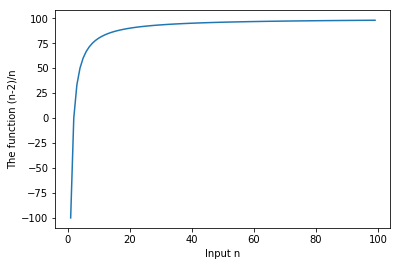

In [42]:
x_ = list(range(1, 100))
y_ = list(map(lambda n:(n-2)*100/n, x_))

plt.plot(x_, y_)
plt.ylabel("The function (n-2)/n")
plt.xlabel("Input n")

plt.show()

In [43]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):

    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]   
    
    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)   
    
    return lp

In [44]:
j = 1                        # Feature number
i = 10                       # Data point number
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+1,:], coefficients)
indicator = (sentiment_train[i:i+1]==+1)

errors = indicator - predictions
gradient_single_data_point = feature_derivative(errors, feature_matrix_train[i:i+1,j])
print ("Gradient single data point: %s" %(gradient_single_data_point))
print ("           --> Should print 0.0")

Gradient single data point: 0.0
           --> Should print 0.0


### Batch Gradient Descent

In [45]:
j = 1                        # Feature number
i = 10                       # Data point start
B = 10                       # Mini-batch size
    
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+B,:], coefficients)
indicator = (sentiment_train[i:i+B]==+1)
print(indicator)
errors = indicator - predictions
print(errors)
gradient_mini_batch = feature_derivative(errors, feature_matrix_train[i:i+B,j])
print ("Gradient mini-batch data points: %s" % gradient_mini_batch)
print ("                --> Should print 1.0")

[ True  True  True  True  True  True  True  True  True  True]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Gradient mini-batch data points: 1.0
                --> Should print 1.0


### Quiz Question: The code block above computed ∑s=ii+B∂ℓs(w)∂wj for j = 10, i = 10, and B = 10. Is this a scalar or a 194-dimensional vector?


In [46]:
print("A scalar")

A scalar


## Quiz Question: For what value of B is the term ∑s=1B∂ℓs(w)∂wj the same as the full gradient ∂ℓ(w)∂wj?

In [47]:
print(train_data.shape[0])

47780


### logistic_regression_SG

In [48]:
np.random.randint(5)

3

In [49]:
help(np.random.random)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

In [63]:
def logistic_regression_SG(feature_matrix, sentiment,\
                           initial_coefficients, batch_size,\
                           max_iter, step_size):
    log_likelihood_all = []
    coefficients = np.array(initial_coefficients)
    
    #Set the seed to 1
    np.random.randint(1)
    
    #Shuffle the data before starting the loop
    permutation = np.random.permutation(len(feature_matrix))
    feature_matrix = feature_matrix[permutation, :]
    sentiment = sentiment[permutation]
    
    #Initialize the index of the current batch
    i = 0
    
    for itr in range(max_iter):
        predictions = predict_probability(feature_matrix, coefficients)
        
        #Calculate the error
        error = (sentiment - predictions)
        
        for j in range(len(coefficients)):
            derivative = feature_derivative(error[i:i+batch_size], feature_matrix\
                                            [i:i+batch_size, j])
            #Update the coefficients
            #print((1/batch_size)*(step_size*derivative))
            coefficients[j] += (1/batch_size)*(step_size*derivative)
            
        # Checking whether log likelihood is increasing
        # Print the log likelihood over the *current batch*
        lp = compute_avg_log_likelihood(feature_matrix[i:i+batch_size,:], sentiment[i:i+batch_size],
                                        coefficients)
        log_likelihood_all.append(lp)
        if itr <= 15 or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) \
         or itr % 10000 == 0 or itr == max_iter-1:
            data_size = len(feature_matrix)
            print ('Iteration %*d: Average log likelihood (of data points  [%0*d:%0*d]) = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, \
                 int(np.ceil(np.log10(data_size))), i, \
                 int(np.ceil(np.log10(data_size))), i+batch_size, lp))  

        # if we made a complete pass over data, shuffle and restart
        i += batch_size
        if i+batch_size > len(feature_matrix):
            permutation = np.random.permutation(len(feature_matrix))
            feature_matrix = feature_matrix[permutation,:]
            sentiment = sentiment[permutation]
            i = 0                

    # We return the list of log likelihoods for plotting purposes.
    return (coefficients, log_likelihood_all)
        

In [83]:
def plotting(X, y, batch_size):
        
    plt.xlabel = "Iterations"
    plt.ylabel = "Log Likelihood"
    
    plt.title = "Batch Size " + str(batch_size)
    
    plt.plot(X, y)

### We now run stochastic gradient ascent over the feature_matrix_train for 10 iterations using:

    initial_coefficients = np.zeros(194)
    step_size = 5e-1
    batch_size = 1
    max_iter = 10

In [85]:
initial_coefficients = np.zeros(194)
step_size = 5e-1
batch_size = 1
max_iter = 10

coeff_train, log_likelihood_train = logistic_regression_SG(feature_matrix_train, sentiment_train,\
                       initial_coefficients, batch_size, max_iter,\
                       step_size)
#Iteration 1: Average log likelihood (of data points  [00001:00002]) = -0.40108422

Iteration 0: Average log likelihood (of data points  [00000:00001]) = -0.00000000
Iteration 1: Average log likelihood (of data points  [00001:00002]) = -0.15832910
Iteration 2: Average log likelihood (of data points  [00002:00003]) = -0.00080659
Iteration 3: Average log likelihood (of data points  [00003:00004]) = -0.01269477
Iteration 4: Average log likelihood (of data points  [00004:00005]) = -0.12526073
Iteration 5: Average log likelihood (of data points  [00005:00006]) = -0.00273750
Iteration 6: Average log likelihood (of data points  [00006:00007]) = -0.00000000
Iteration 7: Average log likelihood (of data points  [00007:00008]) = -0.10285320
Iteration 8: Average log likelihood (of data points  [00008:00009]) = -0.00061790
Iteration 9: Average log likelihood (of data points  [00009:00010]) = -0.01510541


### Quiz Question. When you set batch_size = 1, as each iteration passes, how does the average log likelihood in the batch change?

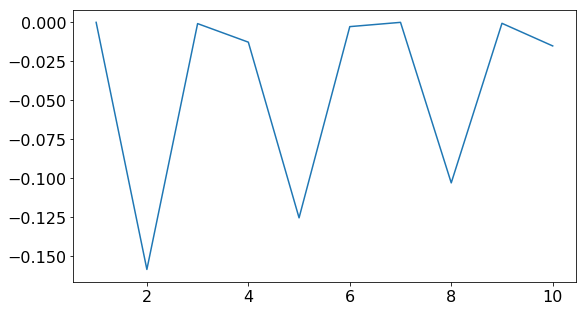

In [86]:
plotting(range(1, max_iter+1), log_likelihood_train, batch_size)

In [52]:
print("Fluctuates")

Fluctuates


### 17. Now run batch gradient ascent over the feature_matrix_train for 200 iterations using:

    initial_coefficients = np.zeros(194)
    step_size = 5e-1
    batch_size = number of rows in feature_matrix_train
    max_iter = 200



In [53]:
feature_matrix_train.shape[0]

47780

In [54]:
initial_coefficients[7]

0.0

In [87]:
initial_coefficients = np.zeros(194)
step_size = 5e-1
batch_size = feature_matrix_train.shape[0]
max_iter = 200

coeff_train, log_likelihood_train = logistic_regression_SG(feature_matrix_train, sentiment_train,\
                       initial_coefficients, batch_size, max_iter,\
                       step_size)

Iteration   0: Average log likelihood (of data points  [00000:47780]) = -0.75477592
Iteration   1: Average log likelihood (of data points  [00000:47780]) = -0.84384637
Iteration   2: Average log likelihood (of data points  [00000:47780]) = -0.92475248
Iteration   3: Average log likelihood (of data points  [00000:47780]) = -0.99654960
Iteration   4: Average log likelihood (of data points  [00000:47780]) = -1.06065146
Iteration   5: Average log likelihood (of data points  [00000:47780]) = -1.11847715
Iteration   6: Average log likelihood (of data points  [00000:47780]) = -1.17118243
Iteration   7: Average log likelihood (of data points  [00000:47780]) = -1.21967772
Iteration   8: Average log likelihood (of data points  [00000:47780]) = -1.26468072
Iteration   9: Average log likelihood (of data points  [00000:47780]) = -1.30676281
Iteration  10: Average log likelihood (of data points  [00000:47780]) = -1.34638463
Iteration  11: Average log likelihood (of data points  [00000:47780]) = -1.3

### Quiz Question. When you set batch_size = len(train_data), as each iteration passes, how does the average log likelihood in the batch change?

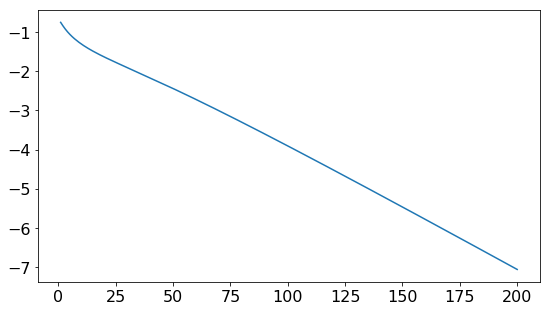

In [88]:
plotting(range(1, max_iter+1), log_likelihood_train, batch_size)

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(log_likelihood_all, len_data, batch_size,\
              smoothing_window=1, label=''):
    plt.rcParams.update({'figure.figsize': (9,5)})
    log_likelihood_all_ma = np.convolve(np.array(log_likelihood_all), \
                                        np.ones((smoothing_window,))/smoothing_window, mode='valid')

    plt.plot(np.array(range(smoothing_window-1, len(log_likelihood_all)))\
             *float(batch_size)/len_data,
             log_likelihood_all_ma, linewidth=4.0, label=label)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.xlabel = "# of passes over data"
    plt.ylabel = "Average log likelihood per data point"
    plt.legend(loc='lower right', prop={'size':14})


In [100]:
help(np.convolve)

Help on function convolve in module numpy:

convolve(a, v, mode='full')
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    The convolution operator is often seen in signal processing, where it
    models the effect of a linear time-invariant system on a signal [1]_.  In
    probability theory, the sum of two independent random variables is
    distributed according to the convolution of their individual
    distributions.
    
    If `v` is longer than `a`, the arrays are swapped before computation.
    
    Parameters
    ----------
    a : (N,) array_like
        First one-dimensional input array.
    v : (M,) array_like
        Second one-dimensional input array.
    mode : {'full', 'valid', 'same'}, optional
        'full':
          By default, mode is 'full'.  This returns the convolution
          at each point of overlap, with an output shape of (N+M-1,). At
          the end-points of the convolution, the signals do not overlap
          co

No handles with labels found to put in legend.


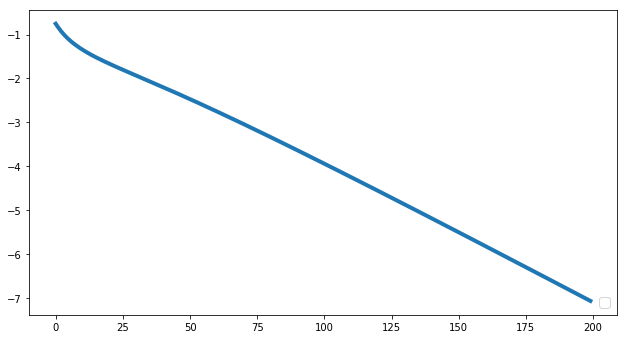

In [82]:
make_plot(log_likelihood_train, feature_matrix_train.shape[0], batch_size)

## 19. With the terminology in mind, let us run stochastic gradient ascent for 10 passes. We will use

    step_size=1e-1
    batch_size=100
    initial_coefficients set to all zeros.



In [89]:
initial_coefficients = np.zeros(194)
step_size = 1e-1
batch_size = 100
max_iter = 10

coeff_train_10_passes, log_likelihood_train_10_passes = logistic_regression_SG(feature_matrix_train, sentiment_train,\
                       initial_coefficients, batch_size, max_iter,\
                       step_size)

Iteration 0: Average log likelihood (of data points  [00000:00100]) = -0.68584921
Iteration 1: Average log likelihood (of data points  [00100:00200]) = -0.67117643
Iteration 2: Average log likelihood (of data points  [00200:00300]) = -0.72579611
Iteration 3: Average log likelihood (of data points  [00300:00400]) = -0.71808632
Iteration 4: Average log likelihood (of data points  [00400:00500]) = -0.76064810
Iteration 5: Average log likelihood (of data points  [00500:00600]) = -0.75726561
Iteration 6: Average log likelihood (of data points  [00600:00700]) = -0.72767622
Iteration 7: Average log likelihood (of data points  [00700:00800]) = -0.76832295
Iteration 8: Average log likelihood (of data points  [00800:00900]) = -0.71828839
Iteration 9: Average log likelihood (of data points  [00900:01000]) = -0.74386156


No handles with labels found to put in legend.


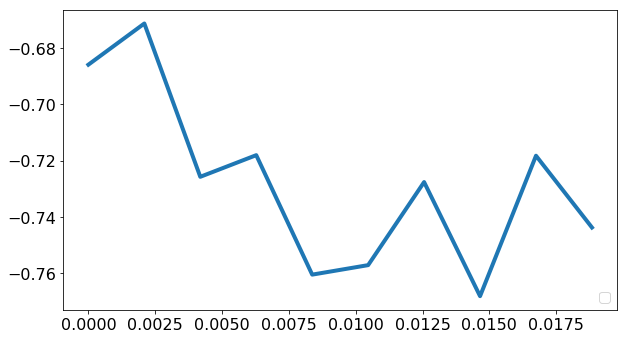

In [90]:
make_plot(log_likelihood_train_10_passes, \
          feature_matrix_train.shape[0], batch_size)

### Stochastic Gradient Ascent V/S Batch Gradient Ascent

stochastic gradient ascent: step_size = 0.1, batch_size=100

batch gradient ascent: step_size = 0.5, batch_size=[# rows in feature_matrix_train]

Write code to run stochastic gradient ascent for 200 passes using:

    step_size=1e-1
    batch_size=100
    initial_coefficients set to all zeros.
  

In [96]:
help(average_log_likelihood)

Help on function average_log_likelihood in module __main__:

average_log_likelihood(feature_matrix, sentiment, weights)



In [95]:
help(compute_avg_log_likelihood)

Help on function compute_avg_log_likelihood in module __main__:

compute_avg_log_likelihood(feature_matrix, sentiment, coefficients)



Iteration   0: Average log likelihood (of data points  [00000:00100]) = -0.68231870
Iteration   1: Average log likelihood (of data points  [00100:00200]) = -0.68867996
Iteration   2: Average log likelihood (of data points  [00200:00300]) = -0.70586411
Iteration   3: Average log likelihood (of data points  [00300:00400]) = -0.74088535
Iteration   4: Average log likelihood (of data points  [00400:00500]) = -0.69391361
Iteration   5: Average log likelihood (of data points  [00500:00600]) = -0.70282520
Iteration   6: Average log likelihood (of data points  [00600:00700]) = -0.73996194
Iteration   7: Average log likelihood (of data points  [00700:00800]) = -0.81859762
Iteration   8: Average log likelihood (of data points  [00800:00900]) = -0.76507245
Iteration   9: Average log likelihood (of data points  [00900:01000]) = -0.81647270
Iteration  10: Average log likelihood (of data points  [01000:01100]) = -0.90497482
Iteration  11: Average log likelihood (of data points  [01100:01200]) = -0.7

No handles with labels found to put in legend.


Iteration 199: Average log likelihood (of data points  [19900:20000]) = -1.93262812


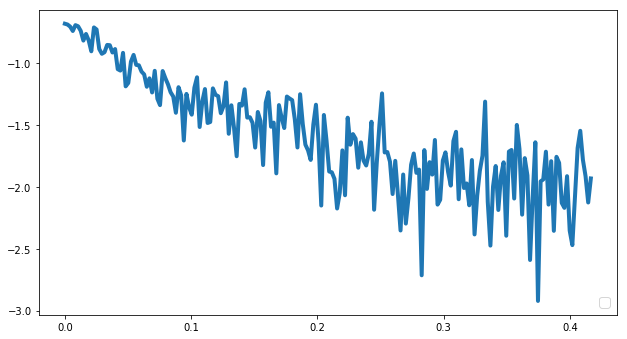

In [106]:
initial_coefficients = np.zeros(194)
step_size = 1e-1
batch_size = 100
max_iter = 200

coeff_train, log_likelihood_train = logistic_regression_SG(feature_matrix_train, sentiment_train,\
                       initial_coefficients, batch_size, max_iter,\
                       step_size)
make_plot(log_likelihood_train, feature_matrix_train.shape[0],\
         batch_size)

### 22. We compare the convergence of stochastic gradient ascent and batch gradient ascent by calling the make_plot function. Apply smoothing with smoothing_window=30.

Quiz Question: In the figure above, how many passes does batch gradient ascent need to achieve a similar log likelihood as stochastic gradient ascent?
Explore the effects of step sizes on stochastic gradient ascent

Iteration 0: Average log likelihood (of data points  [00000:00001]) = -0.01814993
Iteration 1: Average log likelihood (of data points  [00001:00002]) = -0.00112460
Iteration 2: Average log likelihood (of data points  [00002:00003]) = 0.00000000
Iteration 3: Average log likelihood (of data points  [00003:00004]) = -0.19188235
Iteration 4: Average log likelihood (of data points  [00004:00005]) = -0.00006122
Iteration 5: Average log likelihood (of data points  [00005:00006]) = -0.09821237
Iteration 6: Average log likelihood (of data points  [00006:00007]) = -0.00054987
Iteration 7: Average log likelihood (of data points  [00007:00008]) = -0.05083233
Iteration 8: Average log likelihood (of data points  [00008:00009]) = -0.00000009
Iteration 9: Average log likelihood (of data points  [00009:00010]) = -0.00054045


ValueError: x and y must have same first dimension, but have shapes (0,) and (21,)

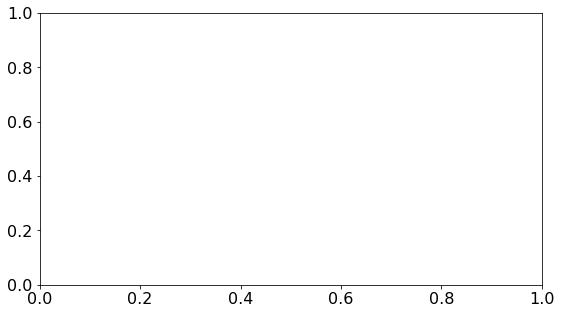

In [107]:
#Stochastic Gradient Ascent
initial_coefficients = np.zeros(194)
step_size = 5e-1
batch_size = 1
max_iter = 10
smoothining_window = 30
 
coeff_train, log_likelihood_train = logistic_regression_SG(feature_matrix_train, sentiment_train,\
                       initial_coefficients, batch_size, max_iter,\
                       step_size)

make_plot(log_likelihood_train, feature_matrix_train.shape[0],\
         batch_size, 30)